In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in the data
original_df = pd.read_csv(r'../../data/first_1000_JSON_files.csv', low_memory=True)

# create a copy to work on
df = original_df.copy()

# change the value in the imei column to display  from scientific notation to standard notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# change dtype of imei column to int64
df['imei'] = df['imei'].astype('int64')

# change dtype of dtd column to datetime
df['dtd'] = pd.to_datetime(df['dtd'])

C:\Users\hb888\AppData\Local\Temp\ipykernel_30168\2475906193.py:2: DtypeWarning: Columns (51,59,62,63,67,69,72,73,86,88,90,91,93,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(r'../../data/first_1000_JSON_files.csv', low_memory=True)


### variables

In [3]:
# set the imei variable to what to filter the rows on (this can be changed manually)
# imei = [868500050064237, 868500050064351, 868500050060516, 868500050058080, 868500050062249]

# set imei to all imei's in the data for a test run
imei = df['imei'].unique()

# set a variable to select the column(s) to display
columns_to_display = ['imei',
                      'dtd',
                      'tracker.metric.bbatp',
                      'device.metric.dactualsp',
                      'device.metric.btemp',
                      'event.key'
                      ]

# set a variable to select which column(s) to focus on during the analysis
columns_to_focus_on = ['tracker.metric.bbatp', 'device.metric.dactualsp', 'device.metric.btemp', 'event.key']

### data exploration

In [4]:
# filter the rows based on the imei variable and display the columns in the columns_to_display variable
# also reset the index
df = df[df['imei'].isin(imei)][columns_to_display].reset_index(drop=True)

In [5]:
df

,imei,dtd,tracker.metric.bbatp,device.metric.dactualsp,device.metric.btemp,event.key
0,868500050010859,2023-11-25 11:54:47+00:00,45.000,NaN,NaN,battery_info
1,868500050010859,2023-11-26 11:54:29+00:00,45.000,NaN,NaN,NaN
2,868500050010859,2023-11-27 11:54:47+00:00,43.000,NaN,NaN,battery_info
3,868500050010859,2023-11-29 07:19:56+00:00,NaN,NaN,NaN,motion_to_rest
4,868500050010859,2023-11-29 07:20:14+00:00,43.000,NaN,NaN,NaN
...,...,...,...,...,...,...
725856,868500050069160,2023-11-14 05:12:09+00:00,27.000,NaN,NaN,NaN
725857,868500050069160,2023-11-15 05:09:46+00:00,27.000,NaN,NaN,battery_info
725858,868500050069160,2023-11-17 05:08:34+00:00,27.000,NaN,NaN,battery_low
725859,868500050069160,2023-11-17 05:09:46+00:00,26.000,NaN,NaN,battery_info


In [6]:
# export the df to a csv file
# uncomment to export the df to a csv file

# df.to_csv(r'../../data/data_exploration_df.csv', index=False)

In [7]:
# show the earliest and latest date in the data
# print(df['dtd'].min())
# print(df['dtd'].max())

# # show rows for the earliest 15 dates in the data
# print(df.nsmallest(15, 'dtd'))

# show all rows where imei = 868500050065176 in a df, but dont show rows where tracker.metric.bbatp = NaN
# df[(df['imei'] == 868500050065176) & (df['tracker.metric.bbatp'].notna())]

In [8]:
# for the columns in the columns_to_focus_on variable, show the value_counts
for column in columns_to_focus_on:
    print(df[column].value_counts(), '\n') # put whitespace between the value_counts for readability

100.000    151653
98.000      20722
97.000      17654
96.000      12811
95.000       9674
            ...  
17.000        511
2.000         456
11.000        452
1.000         438
12.000        421
Name: tracker.metric.bbatp, Length: 81, dtype: int64 

0.000     110551
25.000      9179
19.000      7415
18.000      6826
20.000      6760
21.000      6680
17.000      6511
22.000      6428
24.000      6039
23.000      5831
26.000      5368
16.000      4874
15.000      4551
14.000      3603
13.000      2982
12.000      2573
27.000      2314
11.000      2166
10.000      1870
4.000       1685
9.000       1613
3.000       1565
2.000       1529
8.000       1443
5.000       1308
6.000       1175
7.000       1143
28.000       805
1.000        331
29.000        82
30.000        56
31.000        30
32.000        24
34.000        14
33.000        11
35.000         5
37.000         4
39.000         3
38.000         1
60.000         1
46.000         1
36.000         1
Name: device.metric.dactualsp, dt

In [9]:
# first show the length of the dataframe
print(f'Length of dataframe: {len(df)}', '\n')

# then for the columns_to_focus_on variable, show the NaN values and the percentage of NaN values
for column in columns_to_focus_on:
    print(f'NaN values in {column}: {df[column].isna().sum()}')
    print(f'Percentage of NaN values in {column}: {round(df[column].isna().sum() / len(df) * 100, 2)}%', '\n')

Length of dataframe: 725861 

NaN values in tracker.metric.bbatp: 371612
Percentage of NaN values in tracker.metric.bbatp: 51.2% 

NaN values in device.metric.dactualsp: 510510
Percentage of NaN values in device.metric.dactualsp: 70.33% 

NaN values in device.metric.btemp: 493652
Percentage of NaN values in device.metric.btemp: 68.01% 

NaN values in event.key: 535094
Percentage of NaN values in event.key: 73.72% 



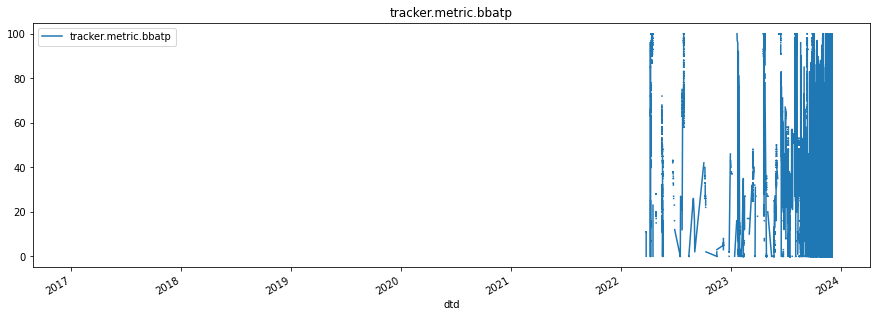

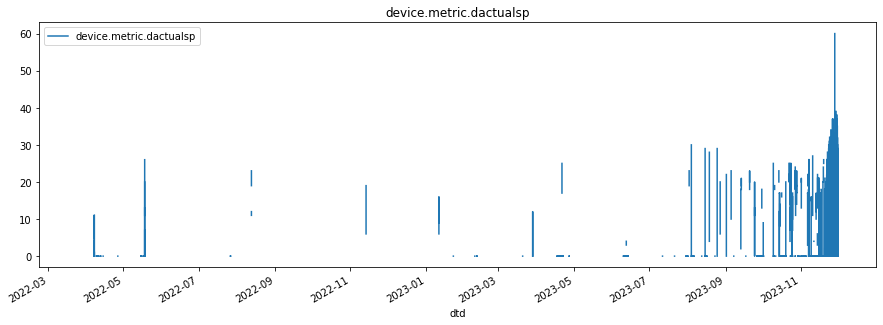

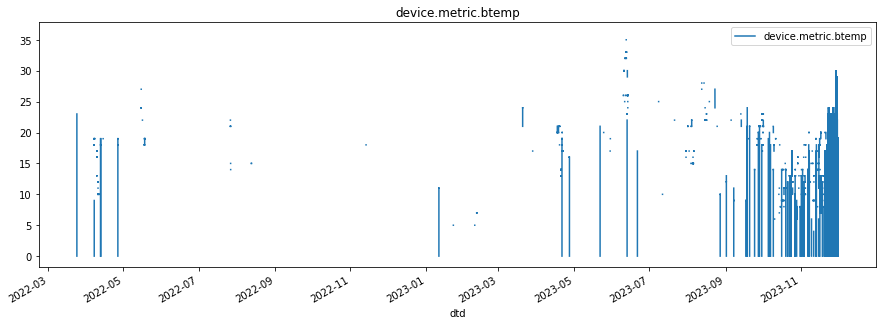

event.key is not a numerical column 



In [10]:
# for the columns_to_focus_on variable, check if it's a numerical column, and if yes, create a plot for the values per dtd
# use a different color for each imei
for column in columns_to_focus_on:
    if df[column].dtype in ['int64', 'float64']:
        df.plot(x='dtd', y=column, title=column, figsize=(15, 5))
        plt.show()
    else:
        print(f'{column} is not a numerical column', '\n')

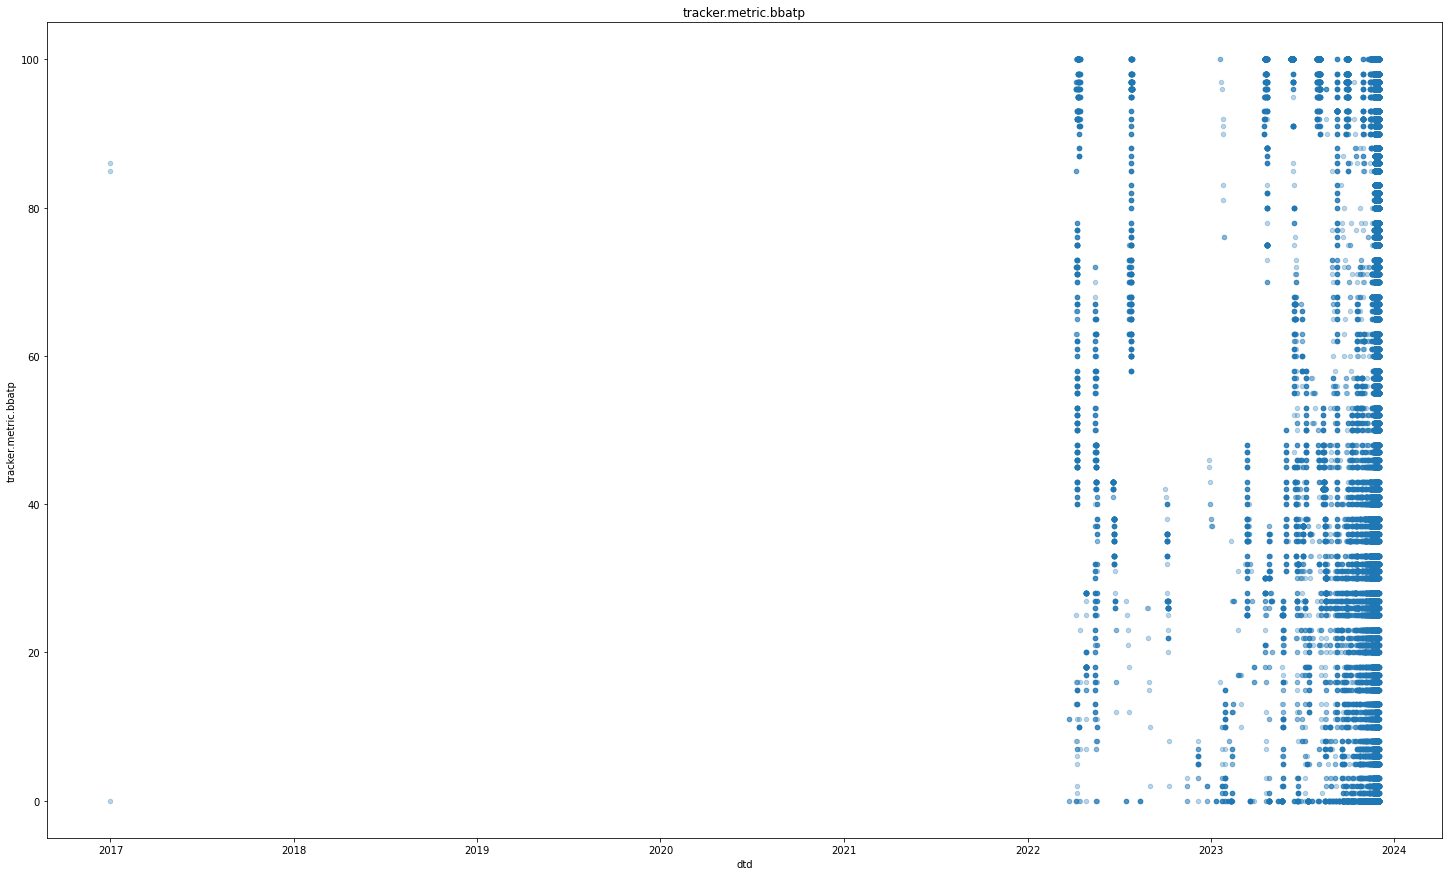

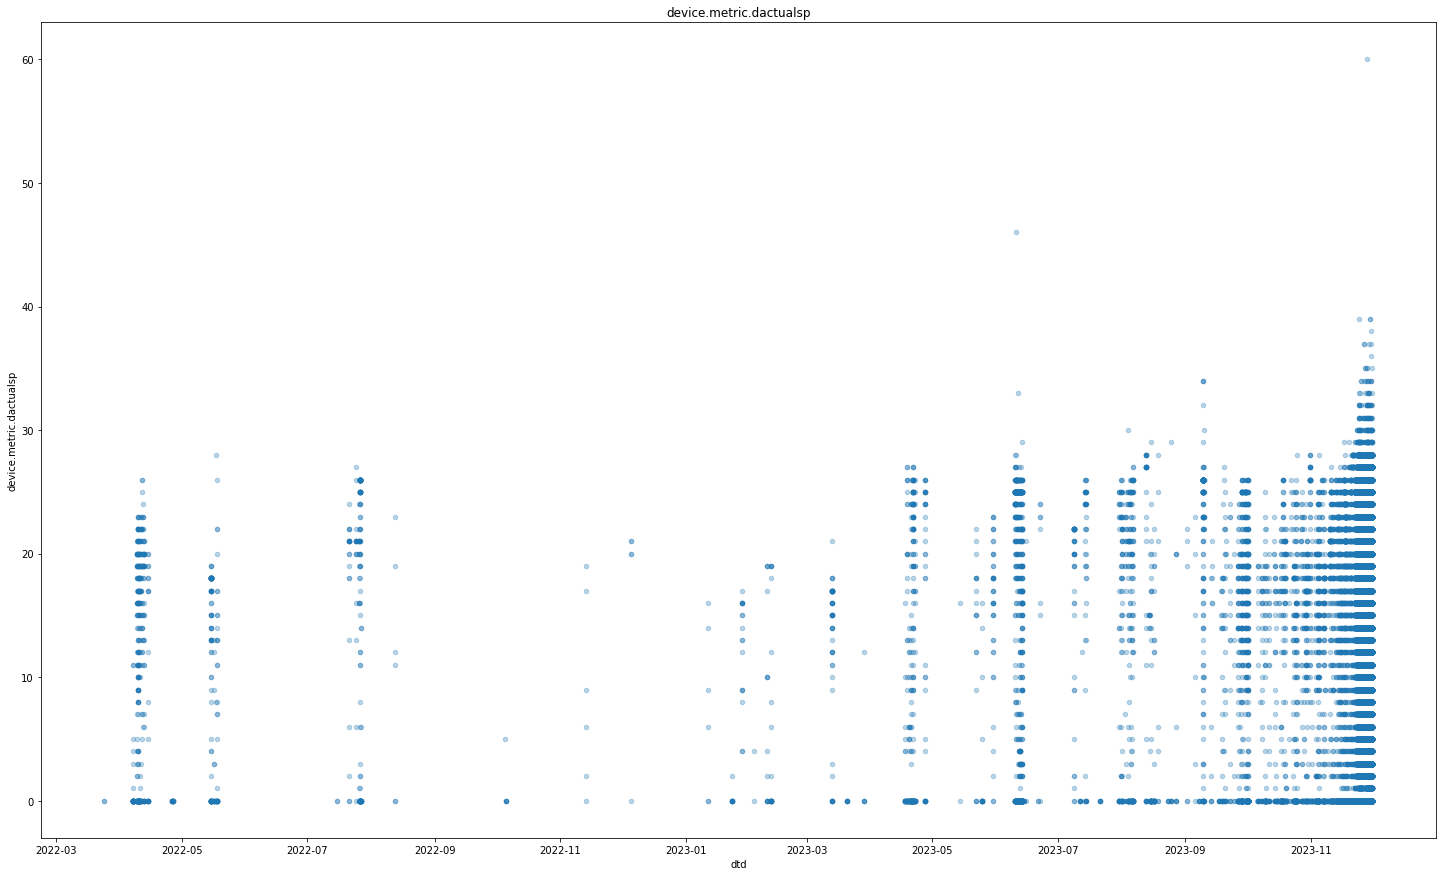

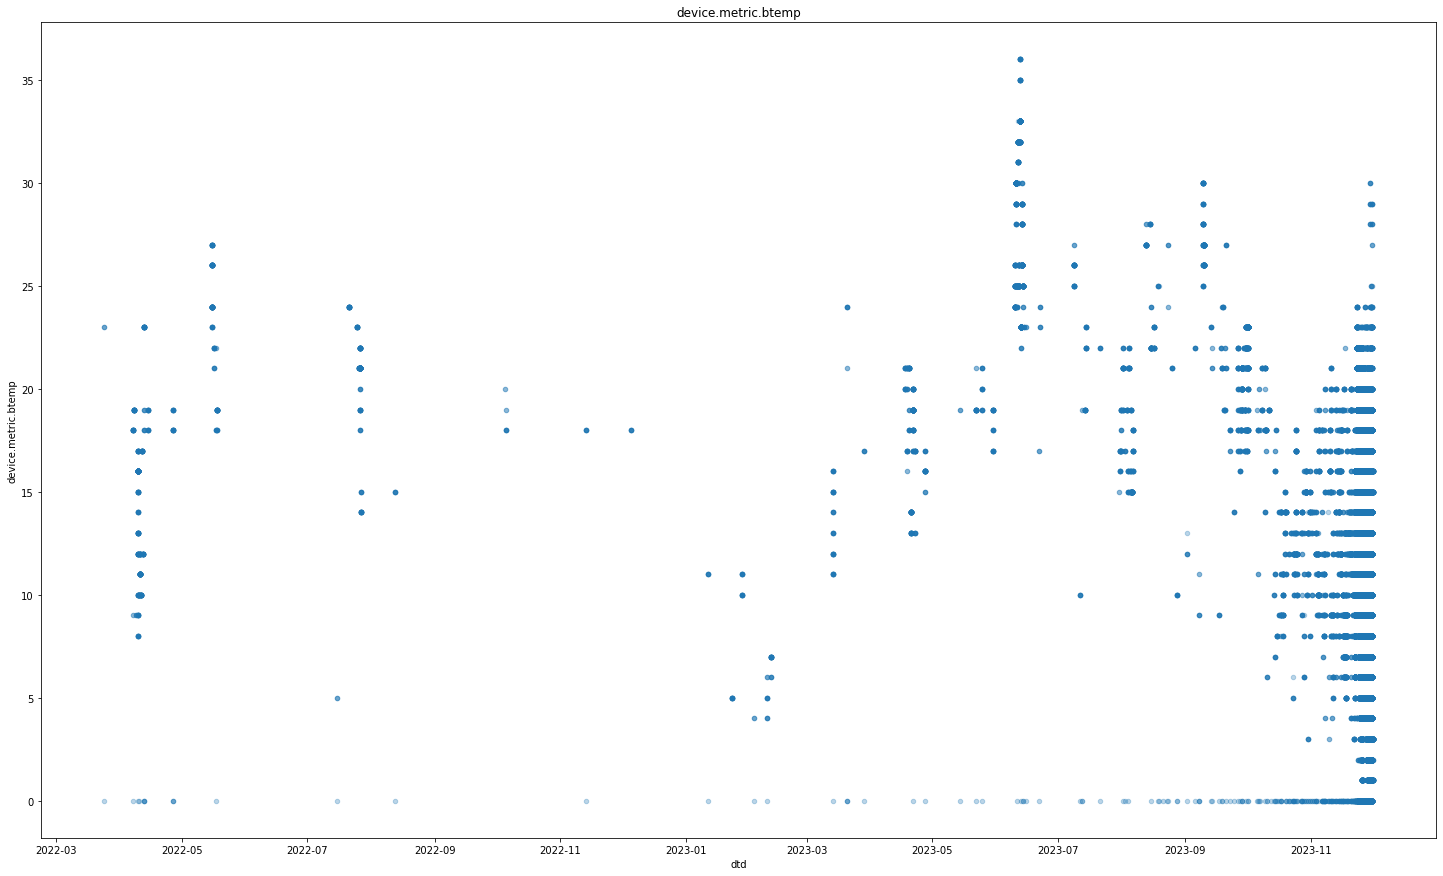

In [11]:
# outliers_df = pd.DataFrame()

# create a scatterplot for the columns_to_focus_on variable, and use a different color for each imei in the same plot
for column in columns_to_focus_on:
    if df[column].dtype in ['int64', 'float64']:
        df.plot(x='dtd', y=column, kind='scatter', title=column, figsize=(25, 15), alpha=0.3)
        plt.show()
        
        # find and store outliers in a df with a column to know which column the outlier is from
#         q1 = df[column].quantile(0.25)
#         q3 = df[column].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - (1.5 * iqr)
#         upper_bound = q3 + (1.5 * iqr)
        
#         outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#         outliers['Outlier_Column'] = column 
#         outliers_df = pd.concat([outliers_df, outliers], ignore_index=True)
#     else:
#         print(f'{column} is not a numerical column', '\n')

# outliers_df